En esta práctica usted ejercitará el procesamiento de archivos usando las funciones propias de
python, las más avanzadas de numpy, y pandas para tratar bases de datos. Los archivos que requiere
para la guía lo encontrará en el directorio Data=Guia de la unidad.

1.Use las funciones de python (sin utilizar numpy) para leer el archivo "visitantes cine 2016.dat".
Defina correctamente la ruta al archivo con la variable str file y use las tres funciones descritas
abajo.

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [4]:
str_file = "../../Tratamiento_datos/data/Guia/visitantes_cine_2016.dat"

In [15]:
f_in = open(str_file, 'r')
print(f_in.read())
f_in.close()

1 408
2 520
3 305
4 312
5 319
6 380
7 540
8 400
9 398
10 299
11 250
12 350



In [18]:
f_in = open(str_file, 'r')
print(f_in.readline())
f_in.close()

1 408



In [19]:
f_in = open(str_file, 'r')
print(f_in.readlines())
f_in.close()

['1 408\n', '2 520\n', '3 305\n', '4 312\n', '5 319\n', '6 380\n', '7 540\n', '8 400\n', '9 398\n', '10 299\n', '11 250\n', '12 350\n']


No olvide abrir y cerrar el archivo despues de procesarlo con las funciones open y close.
Compare los distintos tipos y contenidos de la variable data como resultado de cada función.

2.Lea el primer renglón del mismo archivo y asigne el contenido a dos variables, una con nombre
mes que contenga el mes y la otra vis con el número de visitantes.

In [30]:
f_in = open(str_file, 'r')

line = f_in.readline()
mes, vis = line.split()

f_in.close()

print mes, vis

1 408


3.Procese todo el archivo con un bucle (loop) y guarde el contenido en dos listas con el mismo
nombre de las variables del ejercicio anterior.

In [75]:
mes = []
vis = []

f_in = open(str_file, 'r')

for line in f_in:
    mes.append(float(line.split()[0]))
    vis.append(float(line.split()[1]))

f_in.close()

print(mes, vis)

([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0], [408.0, 520.0, 305.0, 312.0, 319.0, 380.0, 540.0, 400.0, 398.0, 299.0, 250.0, 350.0])


4. Grafique con matplotlib el número de visitantes en función del mes. Calcule el número de
visitantes anuales y el promedio de visitantes mensuales.

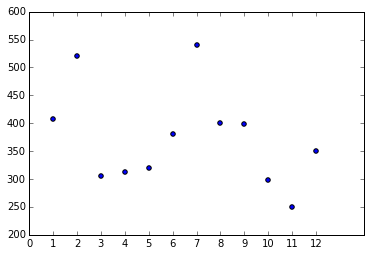

4481.0 373.416666667


In [102]:
plt.scatter(mes, vis)
plt.xticks(np.arange(len(mes)+1))
plt.show()

vis_array = np.array(vis)
annual_visitors = np.sum(vis_array)
mean_annual_visitors = np.mean(vis_array)

print annual_visitors, mean_annual_visitors

In [101]:
f_out = open("annual_visitors.txt", 'w')

f_out.write("Annual visits: {0}\nMean: {1:15.1f}".format (annual_visitors, mean_annual_visitors))
f_out.close()

6. Use la función genfromtxt o loadtxt del módulo numpy para procesar el archivo msd.xvg que
se encuentra en el directorio Data=Guia. Este archivo contiene la desviación cuadrática media
de un partícula (CO2 en agua) en nm2 en función del tiempo de simulación en ps. Grafique
estas dos variables y realice una regresión lineal para calcular el coeficiente de difusión que
equivale a un sexto de la pendiente de la regresión. (El valor obtenido por otro programa lo
encuentra como un comentario al inicio del archivo msd.xvg)

In [220]:
np.loadtxt?

2.20489871418e-05


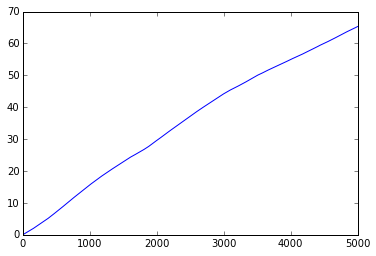

In [224]:
from scipy import stats

t, msd = np.genfromtxt("../../Tratamiento_datos/data/Guia/msd.xvg", skip_header= 10, unpack= True)
slope, intercept, r_value, p_value, std_err = stats.linregress(t, msd)
plt.plot(t, msd) 

# nm^2/ps
diffusion_coefficient = ((slope / 6) * (10 ** -14)) / (10 ** -12)
print(diffusion_coefficient)

7.Guarde los valores del dolar con formato excel

In [283]:
data = np.genfromtxt("../../Tratamiento_datos/data/Guia/dolar.csv", delimiter=',', skip_header=3, missing_values= '', \
                     filling_values= 0., usecols=(1))

In [284]:
data.mean()

468.57629120879125

In [214]:
data

array([ 710.16,  716.94,  715.08,  715.84,  721.31,     nan,     nan,
        723.31,  729.78,  730.28,  726.57,  725.98,     nan,     nan,
        730.31,  730.2 ,  726.19,  729.22,  726.63,     nan,     nan,
        715.63,  717.46,  720.14,  716.21,  711.72,     nan,     nan,
        710.37,  714.44,  713.54,  709.43,  698.49,     nan,     nan,
        700.02,  709.75,  715.41,  711.34,  713.47,     nan,     nan,
        708.63,  701.39,  704.92,  705.44,  700.74,     nan,     nan,
        702.38,  693.78,  693.23,  698.47,  691.36,     nan,     nan,
        689.18,  694.17,  694.82,  688.48,  686.64,     nan,     nan,
        681.39,  681.63,  682.  ,  678.72,  678.22,     nan,     nan,
        683.  ,  684.74,  685.98,  688.11,  672.06,     nan,     nan,
        671.97,  677.52,  677.42,  677.16,     nan,     nan,     nan,
        682.36,  680.84,  683.16,  675.1 ,  669.8 ,     nan,     nan,
        671.24,  669.55,  674.93,  676.62,  680.79,     nan,     nan,
        682.45,  682

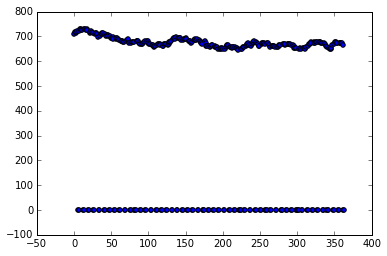

In [285]:
plt.scatter(np.arange(len(data)), data)

In [165]:
import pandas
pandas.read_csv?

In [180]:
data = pandas.read_csv("../../Tratamiento_datos/data/Guia/dolar.csv", skiprows= 2, usecols=(0,1))

In [181]:
data_fill = data.fillna(0)

In [182]:
data_fill['1. D\x97lar observado'].mean()

468.57629120879125

10.Bonus Track (opcional): Busque en internet bajo el link http://www.datos.gob.cl una
base de datos con las precipitaciones en Chile del primer semestre del año 2015. Descargue el
archivo con formato .csv. Procese el archivo con el módulo pandas y analice los datos para
responder a la siguientes preguntas: a. Cuál estación registro la mayor precipitación diaria y
en que fecha ocurrio esto? b. Cuál fue la precipitación acumulada en la estación de Pichoy,
Valdivia durante el primer semestre de este año? (Para esta última pregunta se recomienda
usar la función loc en pandas)

In [293]:
data_precipitaciones = pandas.read_csv("../../Tratamiento_datos/data/Guia/precipitaciones.csv", delimiter=';', header=None, \
                                       names=["ID", "LUGAR", "LOC", "N", "AÑO", "MES", "DIA","AGUA"])

In [299]:
data_precipitaciones.sort_values(["AGUA"],ascending=False)

,ID,LUGAR,LOC,N,AÑO,MES,DIA,AGUA
4612,450001,Puerto Aysén Ad.,45&deg 23' 46'' S,10,2015,5,17,146.0
4584,430004,Alto Palena Ad.,43&deg 36' 42'' S,281,2015,5,16,93.7
4553,430002,Futaleufú Ad.,43&deg 11' 20'' S,347,2015,5,16,93.0
4639,450004,"Teniente Vidal, Coyhaique Ad.",45&deg 35' 38'' S,310,2015,5,15,78.8
5398,380013,"Maquehue, Temuco Ad.",38&deg 46' 4'' S,86,2015,6,1,65.3
4473,390006,"Pichoy, Valdivia Ad.",39&deg 39' 2'' S,21,2015,5,29,63.1
5371,370033,"María Dolores, Los Angeles Ad.",37&deg 24' 10'' S,120,2015,6,4,62.6
5851,950001,"C.M.A. Eduardo Frei Montalva, Antártica",62&deg 11' 35'' S,45,2015,6,23,61.8
4670,450005,Balmaceda Ad.,45&deg 54' 46'' S,517,2015,5,15,61.6
3045,270001,Mataveri Isla de Pascua Ap.,27&deg 9' 38'' S,48,2015,4,8,59.4


In [324]:
valdivia = data_precipitaciones.loc[data_precipitaciones['LUGAR'] == 'Pichoy, Valdivia Ad.']
cummulated_sum = valdivia.AGUA.sum()
cummulated_sum

723.29999999999995